In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, neighbors, multiclass as skmulti, preprocessing as skpre
)

In [2]:
dataset = datasets.load_iris()
(train_ftrs, test_ftrs, 
 train_trgt, test_trgt) = skms.train_test_split(dataset.data, dataset.target, test_size=0.25)

In [3]:
checkout = [0, 50, 100]
print(f"original encoding\n{dataset.target[checkout]}")

original encoding
[0 1 2]


In [73]:
print("multiclass encoding")
print(skpre.label_binarize(dataset.target, classes=[0,1,2])[checkout])

multiclass encoding
[[1 0 0]
 [0 1 0]
 [0 0 1]]


Text(0, 0.5, 'TPR')

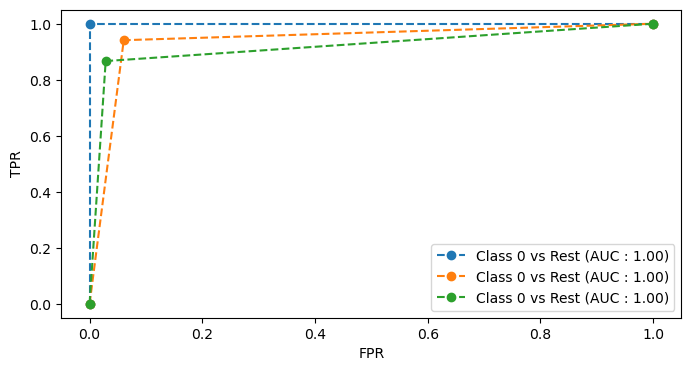

In [4]:
multi_trgt = skpre.label_binarize(dataset.target, classes=[0,1,2])
(train_ftrs, test_ftrs, 
 train_trgt, test_trgt) = skms.train_test_split(dataset.data, multi_trgt, test_size=0.33, random_state=21)
# knn wrapped up in one versus rest.
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
ovr_knn = skmulti.OneVsRestClassifier(knn)
predict = (ovr_knn.fit(train_ftrs, train_trgt)
                  .predict(test_ftrs))
# make the ROC plots
label = "Class {} vs Rest (AUC : {:.2f})"
fig, ax = plt.subplots(figsize=(8, 4))
for classes in [0, 1, 2]:
    fpr, tpr, _ = metrics.roc_curve(test_trgt[:, classes], predict[:, classes])
    label = label.format(classes, metrics.auc(fpr, tpr))
    ax.plot(fpr, tpr, "o--", label=label)
ax.legend(loc="best")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")

In [13]:
dataset = datasets.load_iris()
(train_ftrs, test_ftrs, 
 train_trgt, test_trgt) = skms.train_test_split(dataset.data, dataset.target, test_size=0.33, random_state=21)

In [15]:
# one versus one approach
knn = neighbors.KNeighborsClassifier(5)
ovo_knn = skmulti.OneVsOneClassifier(knn)
predict = (ovo_knn.fit(train_ftrs, train_trgt)
                  .decision_function(test_ftrs))
df = pd.DataFrame(predict)
df["class"] = df.values.argmax(axis=1)
display(df.head())

,0,1,2,class
0,-0.222222,2.166667,1.166667,1
1,2.000000,1.000000,0.000000,0
2,2.000000,1.000000,0.000000,0
3,2.000000,1.000000,0.000000,0
4,-0.222222,2.166667,1.166667,1
